# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [1]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Import data.
epa_data = pd.read_csv('c4_epa_air_quality.csv', index_col=0)
epa_data = epa_data.dropna()

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [3]:
# First 10 rows of the data
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [4]:
# Code Here
epa_data.describe()

,arithmetic_mean,aqi
count,257.000000,257.000000
mean,0.404578,6.782101
std,0.319311,7.091422
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.278947,5.000000
75%,0.516667,9.000000
max,1.921053,50.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: 6.78 parts per million

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A:  There are 257 instances of AQI beaing meassured

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [5]:
# Code Here
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.782101167315175)

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [6]:
# Code Here
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)
sampled_data 

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,0.168421,3
108,2018-01-01,North Dakota,Burleigh,Bismarck,BISMARCK RESIDENTIAL,Carbon monoxide,Parts per million,0.200000,2
73,2018-01-01,Minnesota,Dakota,Lakeville,Near Road I-35,Carbon monoxide,Parts per million,0.200000,2
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,0.347368,5
21,2018-01-01,Iowa,Linn,Cedar Rapids,Public Health,Carbon monoxide,Parts per million,0.100000,1
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,0.168421,3
123,2018-01-01,Michigan,Wayne,Detroit,MARK TWAIN MIDDLE SCHOOL,Carbon monoxide,Parts per million,0.515789,9
216,2018-01-01,Indiana,Vanderburgh,Evansville,Evansville- Lloyd,Carbon monoxide,Parts per million,0.200000,2
89,2018-01-01,Maryland,Howard,North Laurel,Howard County Near Road,Carbon monoxide,Parts per million,0.215789,3
101,2018-01-01,Pennsylvania,Adams,Not in a city,NARSTO SITE ARENDTSVILLE,Carbon monoxide,Parts per million,0.144444,2


### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [7]:
# Code Here
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,0.168421,3
108,2018-01-01,North Dakota,Burleigh,Bismarck,BISMARCK RESIDENTIAL,Carbon monoxide,Parts per million,0.200000,2
73,2018-01-01,Minnesota,Dakota,Lakeville,Near Road I-35,Carbon monoxide,Parts per million,0.200000,2
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,0.347368,5
21,2018-01-01,Iowa,Linn,Cedar Rapids,Public Health,Carbon monoxide,Parts per million,0.100000,1
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,0.168421,3
123,2018-01-01,Michigan,Wayne,Detroit,MARK TWAIN MIDDLE SCHOOL,Carbon monoxide,Parts per million,0.515789,9
216,2018-01-01,Indiana,Vanderburgh,Evansville,Evansville- Lloyd,Carbon monoxide,Parts per million,0.200000,2
89,2018-01-01,Maryland,Howard,North Laurel,Howard County Near Road,Carbon monoxide,Parts per million,0.215789,3
101,2018-01-01,Pennsylvania,Adams,Not in a city,NARSTO SITE ARENDTSVILLE,Carbon monoxide,Parts per million,0.144444,2


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: It is sampled twice

**Question:** What does `random_state` do?

A: It creates a random starting point for the data

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [8]:
# Code Here
sample_mean = sampled_data['aqi'].mean()
sample_mean

np.float64(6.08)

You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: Becasue the sample data set does not include all the same values as the population 

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [9]:
# Code Here
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50, replace=True).mean())

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [10]:
# Code Here
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [11]:
# Code Here
mean_sample_means = estimate_df['estimate'].mean()

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [12]:
# Code Here
mean_sample_means

np.float64(6.794914)

**Question:** How are the central limit theorem and random sampling (with replacement) related?

In [13]:
# Code Here
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.782101167315175)

A: They should be almost the same due to central limit theorem and this is seen in the data

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

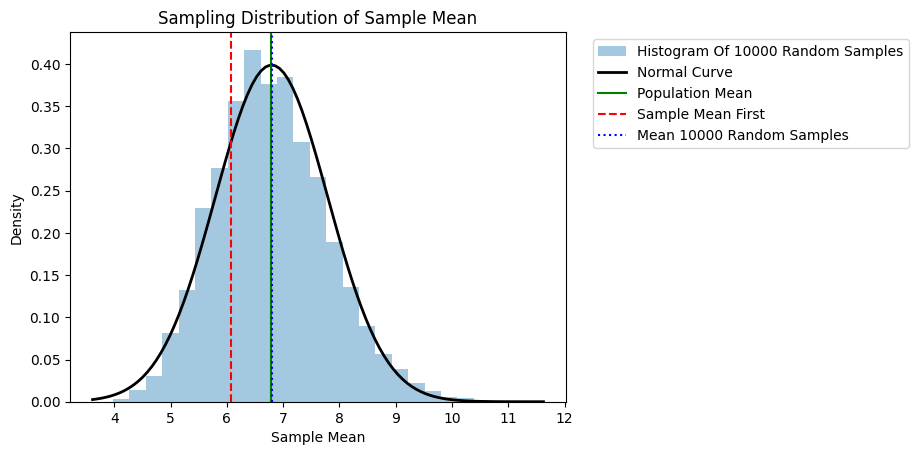

In [15]:
# Code Here
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "Histogram Of 10000 Random Samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'Normal Curve')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'Population Mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'Sample Mean First')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'Mean 10000 Random Samples')
plt.title("Sampling Distribution of Sample Mean")
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [16]:
# Code Here


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

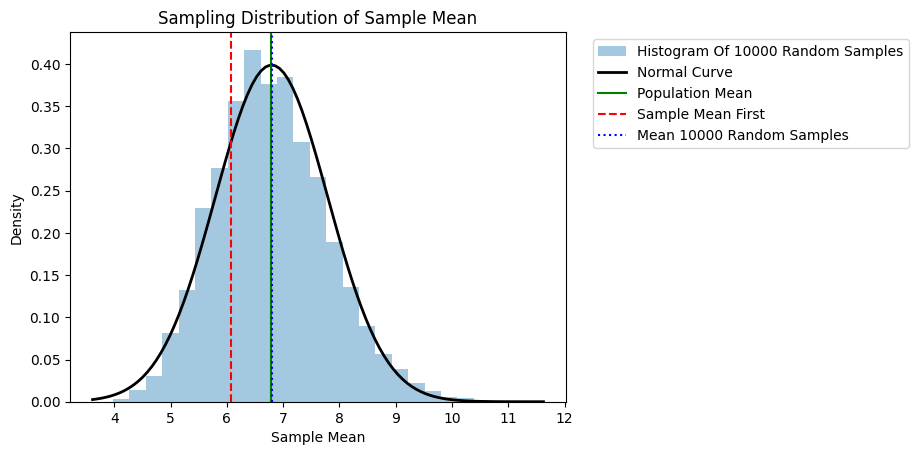

In [18]:
# Code Here
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "Histogram Of 10000 Random Samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'Normal Curve')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'Population Mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'Sample Mean First')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'Mean 10000 Random Samples')
plt.title("Sampling Distribution of Sample Mean")
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

A:

# Considerations

**What are some key takeaways that you learned from this project?**

A: I learned to use cental limit theorem and create graphs

**What findings would you share with others?**

A: I would share the final visualization of the data to indicate it follows a normal distribution

**What would you convey to external readers?**

A: If more tests were run we could isolate to see if there was a group that was statistially different from the population mean and attempt to determine what atributes lead to this difference